# Übung 7

**Lernziele**

In den Übungen dieser Wochen lernen Sie:

* Die `fold` und `map` Funktionen zur Implementierung diverser Listenoperationen einzusetzen.
* Die Daten einer Anwendung mit Hilfe von Summentypen zu strukturieren.
* Anonyme Funktionen zur Darstellung von Abbildungen einzusetzen.
* Funktionen zur Laufzeit eines Programms zu erzeugen und zu verändern.


## Aufgabe 7.1 (P) `unit`, Seiteneffekte, sequentielle Ausführung

In OCaml können Funktionen Seiteneffekte beinhalten ohne dass sich dies in der Signatur
widerspiegelt.

In [ ]:
let succ x = x + 1

In [ ]:
let succ x = print_int x; x + 1

Für Bibliotheksfunktionen gilt die Konvention, dass diese den Typ `unit` liefern, wenn
sie auf Seiteneffekten basieren (z.B. `print_int : int -> unit`). Das Ziel dieser Funktionen
ist der Seiteneffekt - `unit` hat nur einen Wert, und enthält daher keine nützliche
Information.

In [ ]:
#show_type unit

In [ ]:
let a,b = "1","2" in
let () = print_endline a in (* exhaustive pattern *)
let _ = print_endline b in (* _ matches everything *)
a

In OCaml gibt es ; um diese Sequenzen etwas kompakter schreiben zu können:

In [ ]:
let a,b = "1","2" in
print_endline a;
print_endline b;
a

Den Typ von `;` kann man sich als `unit -> 'a -> 'a` vorstellen. Allerdings ist dies ein
spezieller Operator, den wir nicht selbst definieren können, da Applikation zwar linksassoziativ
ist, Argumente aber von rechts nach links ausgewertet werden.

## Aufgabe 7.2 (P) Funktionen höherer Ordnung auf Listen

Listen sind in OCaml, bis auf den syntaktischen Zucker (`[1;2]` = `1::2::[]`), auch nur
ein normaler Summentyp:

In [ ]:
#show_type list

In [ ]:
[1;2;3;4;5]

In [ ]:
1::2::3::4::5::[]

In [ ]:
(::) (1, (::) (2, (::) (3, (::) (4, (::) (5, [])))))

Das Gegenstück zu Schleifen in imperativen Sprachen, ist die Rekursion in funktionalen
Sprachen. Nachdem Sie einige rekursive Funktionen auf Listen definiert haben, stellen
Sie vielleicht fest, dass diese ein Schema einhalten, welches wir abstrahieren können. In
OCaml gibt es für Listen z.B. `fold_left` und `fold_right` welche eine Liste von links
bzw. rechts falten. Beide erwarten eine Funktion $f$, welche jeweils ein Element der Liste
und den Akkumulator erhält und einen neuen Wert dafür liefert, und den Initialwert $z$.
Wir können den Unterschied bzgl. der Anwendung von $f$ wie folgt visualisieren (Haskell,
in OCaml `::` statt `:`):

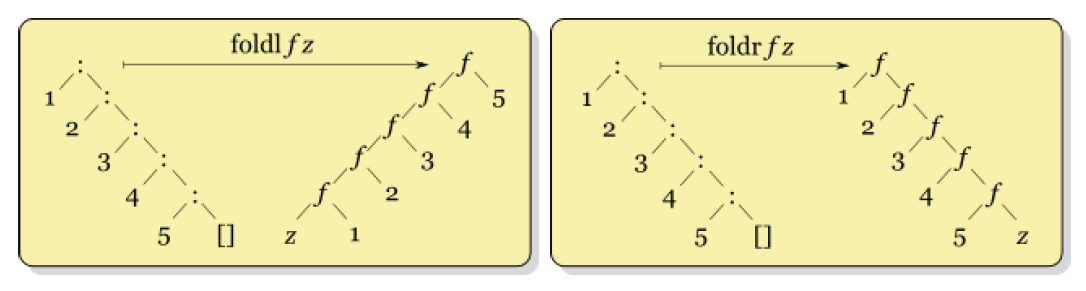

In OCaml erwartet `fold_right` die Liste vor $z$:

In [ ]:
List.fold_left

In [ ]:
List.fold_right

_Bemerkung_: Typvariablen werden alphabetisch vergeben; beide Funktionen liefern den
Typ des Akkumulators.

**Aufgabe**: Implementieren Sie folgende Funktionen:

1. `fold_left : ('a -> 'b -> 'a) -> 'a -> 'b list -> 'a`
2. `fold_right : ('a -> 'b -> 'b) -> 'a list -> 'b -> 'b`
3. `sum : int list -> int`
4. `map : ('a -> 'b) -> 'a list -> 'b list`
5. `map_rev : ('a -> 'b) -> 'a list -> 'b list`

In [1]:
(*1*)

let rec fold_left f a xs =
  match xs with
    [] -> a
  | x :: xs -> fold_left f (f a x) xs

val fold_left : ('a -> 'b -> 'a) -> 'a -> 'b list -> 'a = <fun>


In [2]:
(*2*)

let rec fold_right f xs b =
  match xs with
    [] -> b
  | x :: xs -> f x (fold_right f xs b)

val fold_right : ('a -> 'b -> 'b) -> 'a list -> 'b -> 'b = <fun>


In [3]:
(* alternativ endrekursiv *)

let fold_right f xs b = fold_left f b (List.rev xs)

val fold_right : ('a -> 'b -> 'a) -> 'b list -> 'a -> 'a = <fun>


In [4]:
(*3*)

let sum xs = fold_left (+) 0 xs

val sum : int list -> int = <fun>


In [5]:
(*4*)

let map f xs = fold_right (fun x a -> f x :: a) xs []

val map : ('a list -> 'a) -> 'a list -> 'a list = <fun>


In [6]:
(*5*)

let map_rev f xs = fold_left (fun x a -> f x :: a) [] xs

val map_rev : ('a list -> 'a) -> 'a list list -> 'a list = <fun>


Bestimmen Sie für Ihre Implementierungen zudem ob diese endrekursiv sind bzw. ob
diese nur endrekursive Funktionen aufrufen und stellen Sie, falls möglich, endrekursive
Versionen her.

# Aufgabe 7.3 (P) Bäume falten

Gegeben sei folgende Typ-Definition eines binären Baumes:

In [20]:
type 'a tree = Node of 'a * 'a tree * 'a tree | Leaf

type 'a tree = Node of 'a * 'a tree * 'a tree | Leaf


Hier der Beispielbaum von letzter Woche:

In [21]:
let tree = Node (5, Node (2, Node (1, Leaf, Leaf), Node (3, Leaf, Leaf)), Node (7, Leaf, Leaf))

val tree : int tree =
  Node (5, Node (2, Node (1, Leaf, Leaf), Node (3, Leaf, Leaf)),
   Node (7, Leaf, Leaf))


Implementieren Sie die Funktion

```ocaml
val fold_left : ('a -> 'b -> 'a) -> 'a -> 'b tree -> 'a
```

die alle Werte per in-order Traversal faltet.

In [22]:
(*TODO*)

let rec fold_left f a t =
  match t with
    Leaf -> a
  | Node (x, l, r) -> fold_left f (f (fold_left f a l) x) r

val fold_left : ('a -> 'b -> 'a) -> 'a -> 'b tree -> 'a = <fun>


Implementieren Sie die Funktion

```ocaml
val sum : int tree -> int
```

welche die Summe aller Werte des Baumes berechnet mithilfe von `fold_left`.

In [30]:
let sum t = fold_left (+) 0 t

val sum : int tree -> int = <fun>


In [24]:
sum tree

- : int = 18


Implementieren Sie die Funktion

```ocaml
val to_list : 'a tree -> 'a list
```

die eine Liste mit allen Werten des Baums erstellt mithilfe von `fold_left`. Die
Elemente der Liste sollen dabei dem in-order Traversal des Baums entsprechen.

In [31]:
let to_list t = fold_left (fun a x -> a @ [x]) [] t

val to_list : 'a tree -> 'a list = <fun>


In [29]:
to_list tree

- : int list = [1; 2; 3; 5; 7]


# Aufgabe 7.4 (P) Ausdrücke auswerten

Um arithmetische Ausdrücke über `int`-Konstanten und -Variablen darzustellen, definieren
wir die folgenden Typen:

In [32]:
type const = int
type var = string
type unary_op = Neg
type binary_op = Add | Sub | Mul | Div
type expr = Const of const
  | Var of var
  | Unary of unary_op * expr
  | Binary of expr * binary_op * expr

type const = int


type var = string


type unary_op = Neg


type binary_op = Add | Sub | Mul | Div


type expr =
    Const of const
  | Var of var
  | Unary of unary_op * expr
  | Binary of expr * binary_op * expr


Weiterhin definieren wir einen Zustand (State), welcher Variablen auf deren Werte abbildet.

In [33]:
type state = var -> const

type state = var -> const


Konvertierung zu String Darstellung.

In [43]:
let string_of_unary = function
    Neg -> "-"

let string_of_binary = function
    Add -> "+"
  | Sub -> "-"
  | Mul -> "*"
  | Div -> "/"

let rec string_of_expr = function
    Const c -> string_of_int c
  | Var v -> v
  | Unary (op, e) ->
      string_of_unary op
      ^ "(" ^ string_of_expr e ^ ")"
  | Binary (e1, op, e2) ->
      "(" ^ string_of_expr e1 ^ " "
      ^ string_of_binary op ^ " "
      ^ string_of_expr e2 ^ ")"

val string_of_unary : unary_op -> string = <fun>


val string_of_binary : binary_op -> string = <fun>


val string_of_expr : expr -> var = <fun>


Stellen Sie die folgenden Ausdrücke mit Hilfe der gegebenen Typen dar:

* `3 + x`
* `y * -x + 5`
* `(x - 7) * y / 2`

In [41]:
let exA = Binary (Const 3, Add, Var "x")

val exA : expr = Binary (Const 3, Add, Var "x")


In [44]:
string_of_expr exA

- : var = "(3 + x)"


In [46]:
let exB = Binary (Binary (Var "y", Mul, Unary (Neg, Var "x")), Add, Const 5)

val exB : expr =
  Binary (Binary (Var "y", Mul, Unary (Neg, Var "x")), Add, Const 5)


In [47]:
string_of_expr exB

- : var = "((y * -(x)) + 5)"


In [50]:
let exC = Binary (Binary (Binary (Var "x", Sub, Const 7), Mul, Var "y"), Div, Const 2)

val exC : expr =
  Binary (Binary (Binary (Var "x", Sub, Const 7), Mul, Var "y"), Div,
   Const 2)


In [51]:
string_of_expr exC

- : var = "(((x - 7) * y) / 2)"


Implementieren Sie die Funktion `eval_expr : state -> expr -> const`, die den Wert eines arithmetischen Ausdrucks (2. Argument) berechnet, wobei die Werte der Variablen durch den übergebenen Zustand (1. Argument) gegeben sind.

In [53]:
let rec eval_expr s = function
    Const c -> c
  | Var v -> s v
  | Unary (Neg, e) -> - eval_expr s e
  | Binary (e1, op, e2) ->
      let v1, v2 = eval_expr s e1, eval_expr s e2 in
      match op with
          Add -> v1 + v2
        | Sub -> v1 - v2
        | Mul -> v1 * v2
        | Div -> v1 / v2
    

val eval_expr : (var -> const) -> expr -> const = <fun>


Nutzen Sie Ihre Funktion eval_expr um die in 1. definierten Ausdrücke auszuwerten. Verwenden Sie dazu die Variablenbelegung $\{x \mapsto 5, y \mapsto −1\}$.

In [34]:
let state = function "x" -> 5 | "y" -> -1 | _ -> failwith "undefined"

val state : string -> int = <fun>


In [55]:
eval_expr state exA

- : const = 8


In [56]:
eval_expr state exB

- : const = 10


In [57]:
eval_expr state exC

- : const = 1
